# The Board Representations
The Board and Move classes are meant to be human-friendly in print and ML-friendly in their internal representation

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
BOARD_SIZE=15

### The mathematical representation $(N+2) \times (N+2) \times 3$
Observe that the board is actually larger and features three channels:
 - one channel exclusively for stones of the current player (next to move)
 - one channel exclusively for stones of the other player
 - one channel for the 'physical' boundary of the board

#### Fastest representation for quick analysis
`print_channels`

In [9]:
from aegomoku.tools import print_channels
from aegomoku.constants_15x15 import *

board = GomokuBoard(BOARD_SIZE, stones="d4e5f6g7d5")

print_channels(board.canonical_representation(), combine=True)

shape: (17, 17, 3)
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]


#### We can chose between X=black and X=current

In [10]:
# For humans:  X is always black
board.plot()

                                                     
15    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
14    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
13    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
12    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
11    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
10    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 9    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 8    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 7    .  .  .  .  .  .  O  .  .  .  .  .  .  .  .    
 6    .  .  .  .  .  X  .  .  .  .  .  .  .  .  .    
 5    .  .  . [X] O  .  .  .  .  .  .  .  .  .  .    
 4    .  .  .  X  .  .  .  .  .  .  .  .  .  .  .    
 3    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 2    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 1    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
                                                     
      A  B  C  D  E  F  G  H  I  J  K  L  M  N  O


In [11]:
# For ML:  X is always next player
board.plot(x_is_next=True)
board.act(D6)
board.plot(x_is_next=True)

                                                     
15    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
14    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
13    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
12    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
11    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
10    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 9    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 8    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 7    .  .  .  .  .  .  X  .  .  .  .  .  .  .  .    
 6    .  .  .  .  .  O  .  .  .  .  .  .  .  .  .    
 5    .  .  . [O] X  .  .  .  .  .  .  .  .  .  .    
 4    .  .  .  O  .  .  .  .  .  .  .  .  .  .  .    
 3    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 2    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
 1    .  .  .  .  .  .  .  .  .  .  .  .  .  .  .    
                                                     
      A  B  C  D  E  F  G  H  I  J  K  L  M  N  O
                                

---
#### All positions are validated

In [13]:
board = GomokuBoard(BOARD_SIZE, stones="d4d16o4")

AssertionError: Not all stones in valid range

In [14]:
board.act(D4)

AssertionError: D4 is occupied.

---

## The board API

In [15]:
# Take a minute to think about it: Stones make only sense in the context of a specific board instance!
Stone = board.Stone

In [16]:
move = Stone(A, BOARD_SIZE)
# board coordinates start with 1 and end with n because the boundary stones are part of the board
print(f"{move} = ({move.r}, {move.c}) - ordinal = {move.i}")

A15 = (0, 0) - ordinal = 0


In [18]:
move = C13
print(f"{move} = ({move.r}, {move.c}) - ordinal = {move.i}")

C13 = (2, 2) - ordinal = 32


In [22]:
board.get_stones()

[D4, E5, F6, G7, D5, D6]

In [23]:
board.undo()

D4 E5 F6 G7 D5 (White next)

In [25]:
board.get_string_representation()

'[-154, -126, 153, 168]'

In [26]:
board.canonical_representation().shape

(17, 17, 3)

---

## Even better visualization with matplotlib

In [27]:
import numpy as np
import aegomoku.tools as gt
from aegomoku.utils import analyse_board
from aegomoku.policies.heuristic_policy import HeuristicPolicy
from aegomoku.gomoku_board import GomokuBoard

In [28]:
BOARD_SIZE = 15

In [29]:
stones = "C11F9E9G8F7G7G9H8I8H7I6I9F6H6H9I5J4"

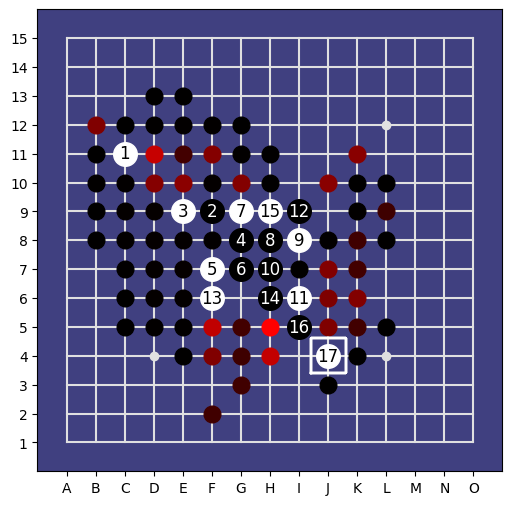

In [32]:
policy = HeuristicPolicy(BOARD_SIZE)
analyse_board(BOARD_SIZE, stones, policy)

# Symmetries
The board, together with the resulting probabilities can be rotated or flipped to produce just another valid training example. In total, we 8-fold our training data.

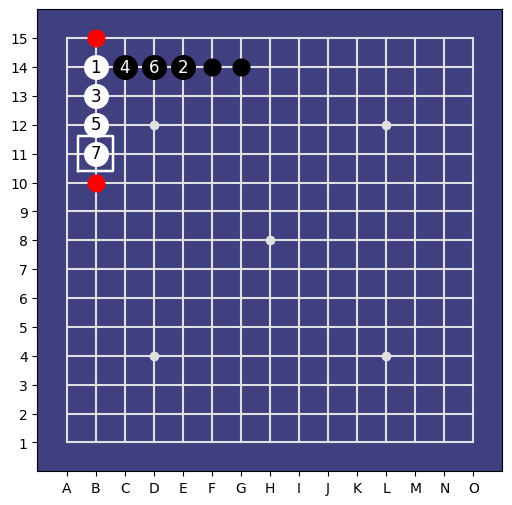

In [56]:
stones="B14E14B13C14B12D14B11"
board = GomokuBoard(BOARD_SIZE, stones=stones)
analyse_board(BOARD_SIZE, stones, policy)

In [57]:
from aegomoku.utils import expand

probs, v = policy.call(expand(board.canonical_representation()))

In [58]:
from aegomoku.gomoku_game import GomokuGame

gomoku = GomokuGame(15)
math_rep = board.canonical_representation()
symmetries = gomoku.get_symmetries(math_rep, probs)
symmetries[0][0].shape, len(symmetries[0][1])

((17, 17, 3), 225)

We see the board diagonally flipped

In [59]:
gt.print_channels(symmetries[0][0])

shape: (17, 17, 3)
[[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 2 2 2 2 0 3]
 [3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3]
 [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]]


### Equivariance: The probabilties rotate with the board

In [62]:
for i in range(8):
    print((np.array(symmetries[i][1]).reshape(15, 15) * 100).astype(int))
    print()

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 49  0  0  0  0 49]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 